In [5]:
import cantera as ct
from PIL import Image
from subprocess import run
import sys
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
gas = ct.Solution('/work/westgroup/nora/Code/projects/halogens/refrigerants/singles/Burgess_Comments/cantera/Nora/2_BTP/FFCM_seed/2_BTP_seed/chemkin/copies/copy_chem0145.cti')

diagram = ct.ReactionPathDiagram(gas,'H(8)')

In [7]:
species_con =  {'CH4(3)': 0.5, 'O2(4)': 1, 'N2': 3.76, '2-BTP(1)': 0.01}

In [8]:
gas.TPX = 400, 1.01325e5, species_con
r = ct.FreeFlame(gas)

In [9]:
r.solve()


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.204e-05      4.633
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008211      4.285
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.055e-05      6.098
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.463e-05      6.175
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003749      4.966
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006406      3.523
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01824      2.923
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02309      3.095
Attempt Newton solution of steady-state problem...    failure. 


In [10]:
diagram = ct.ReactionPathDiagram(r.gas,'H')

In [11]:
diagram.title = 'Reaction path diagram following H'
diagram.label_threshold = 0.01

dot_file = 'rxnpath.dot'
img_file = 'rxnpath.png'
img_path = Path.cwd().joinpath(img_file)

diagram.write_dot(dot_file)
print(diagram.get_data())

print("Wrote graphviz input file to '{0}'.".format(Path.cwd().joinpath(dot_file)))

run('dot {0} -Tpng -o{1} -Gdpi=200'.format(dot_file, img_file).split())
print("Wrote graphviz output file to '{0}'.".format(img_path))


Reaction path diagram following H
H(8) OH(2) H2(10) H2O(5) HO2(13) H2O2(14) HCO(17) CH(7) CH2(T)(18) CH3(19) CH2O(20) HCCO(21) C2H(22) C2H2(23) H2CC(24) CH2(S)(25) CH3O(27) CH2CO(28) C2H4(30) C2H3(29) CH4(3) C2H5(32) CH2OH(33) CH3OH(26) CH3CO(34) CH2CHO(35) CH3CHO(36) C2H6(31) S(132) 2-BTP(1) S(136) S(137) CF3CCH(84) HBR(92) S(186) S(730) S(724) S(774) S(129) S(172) S(164) S(125) S(787) S(788) S(559) S(144) S(746) CH3O2(428) S(127) S(1329) CHF3(42) S(495) C3HF3(637) S(130) CBr(425) S(161) S(162) S(1331) S(200) S(814) S(140) S(1732) HF(38) S(427) S(1620) S(1900) S(143) S(1853) C2H2O(215) S(1838) CH2Br(969) S(1508) S(2617) S(1362) S(2951) S(273) S(1324) S(3918) FCBr(2948) S(3312) S(1931) S(641) S(1993) CH2O2(233) S(2407) CHO2(230) S(160) S(4420) S(965) S(5991) S(6009) S(6180) C#CC(5272) S(6010) C3H4(6823) S(2612) S(4579) S(5883) CHF2(82) S(3734) S(257) S(2391) S(6375) S(1914) CH2CF2(57) CH2F2(41) C3H3(6822) S(985) S(8847) S(7874) S(9794) S(9115) S(5929) S(7035) C3H2O(285) S(10637) S(5927

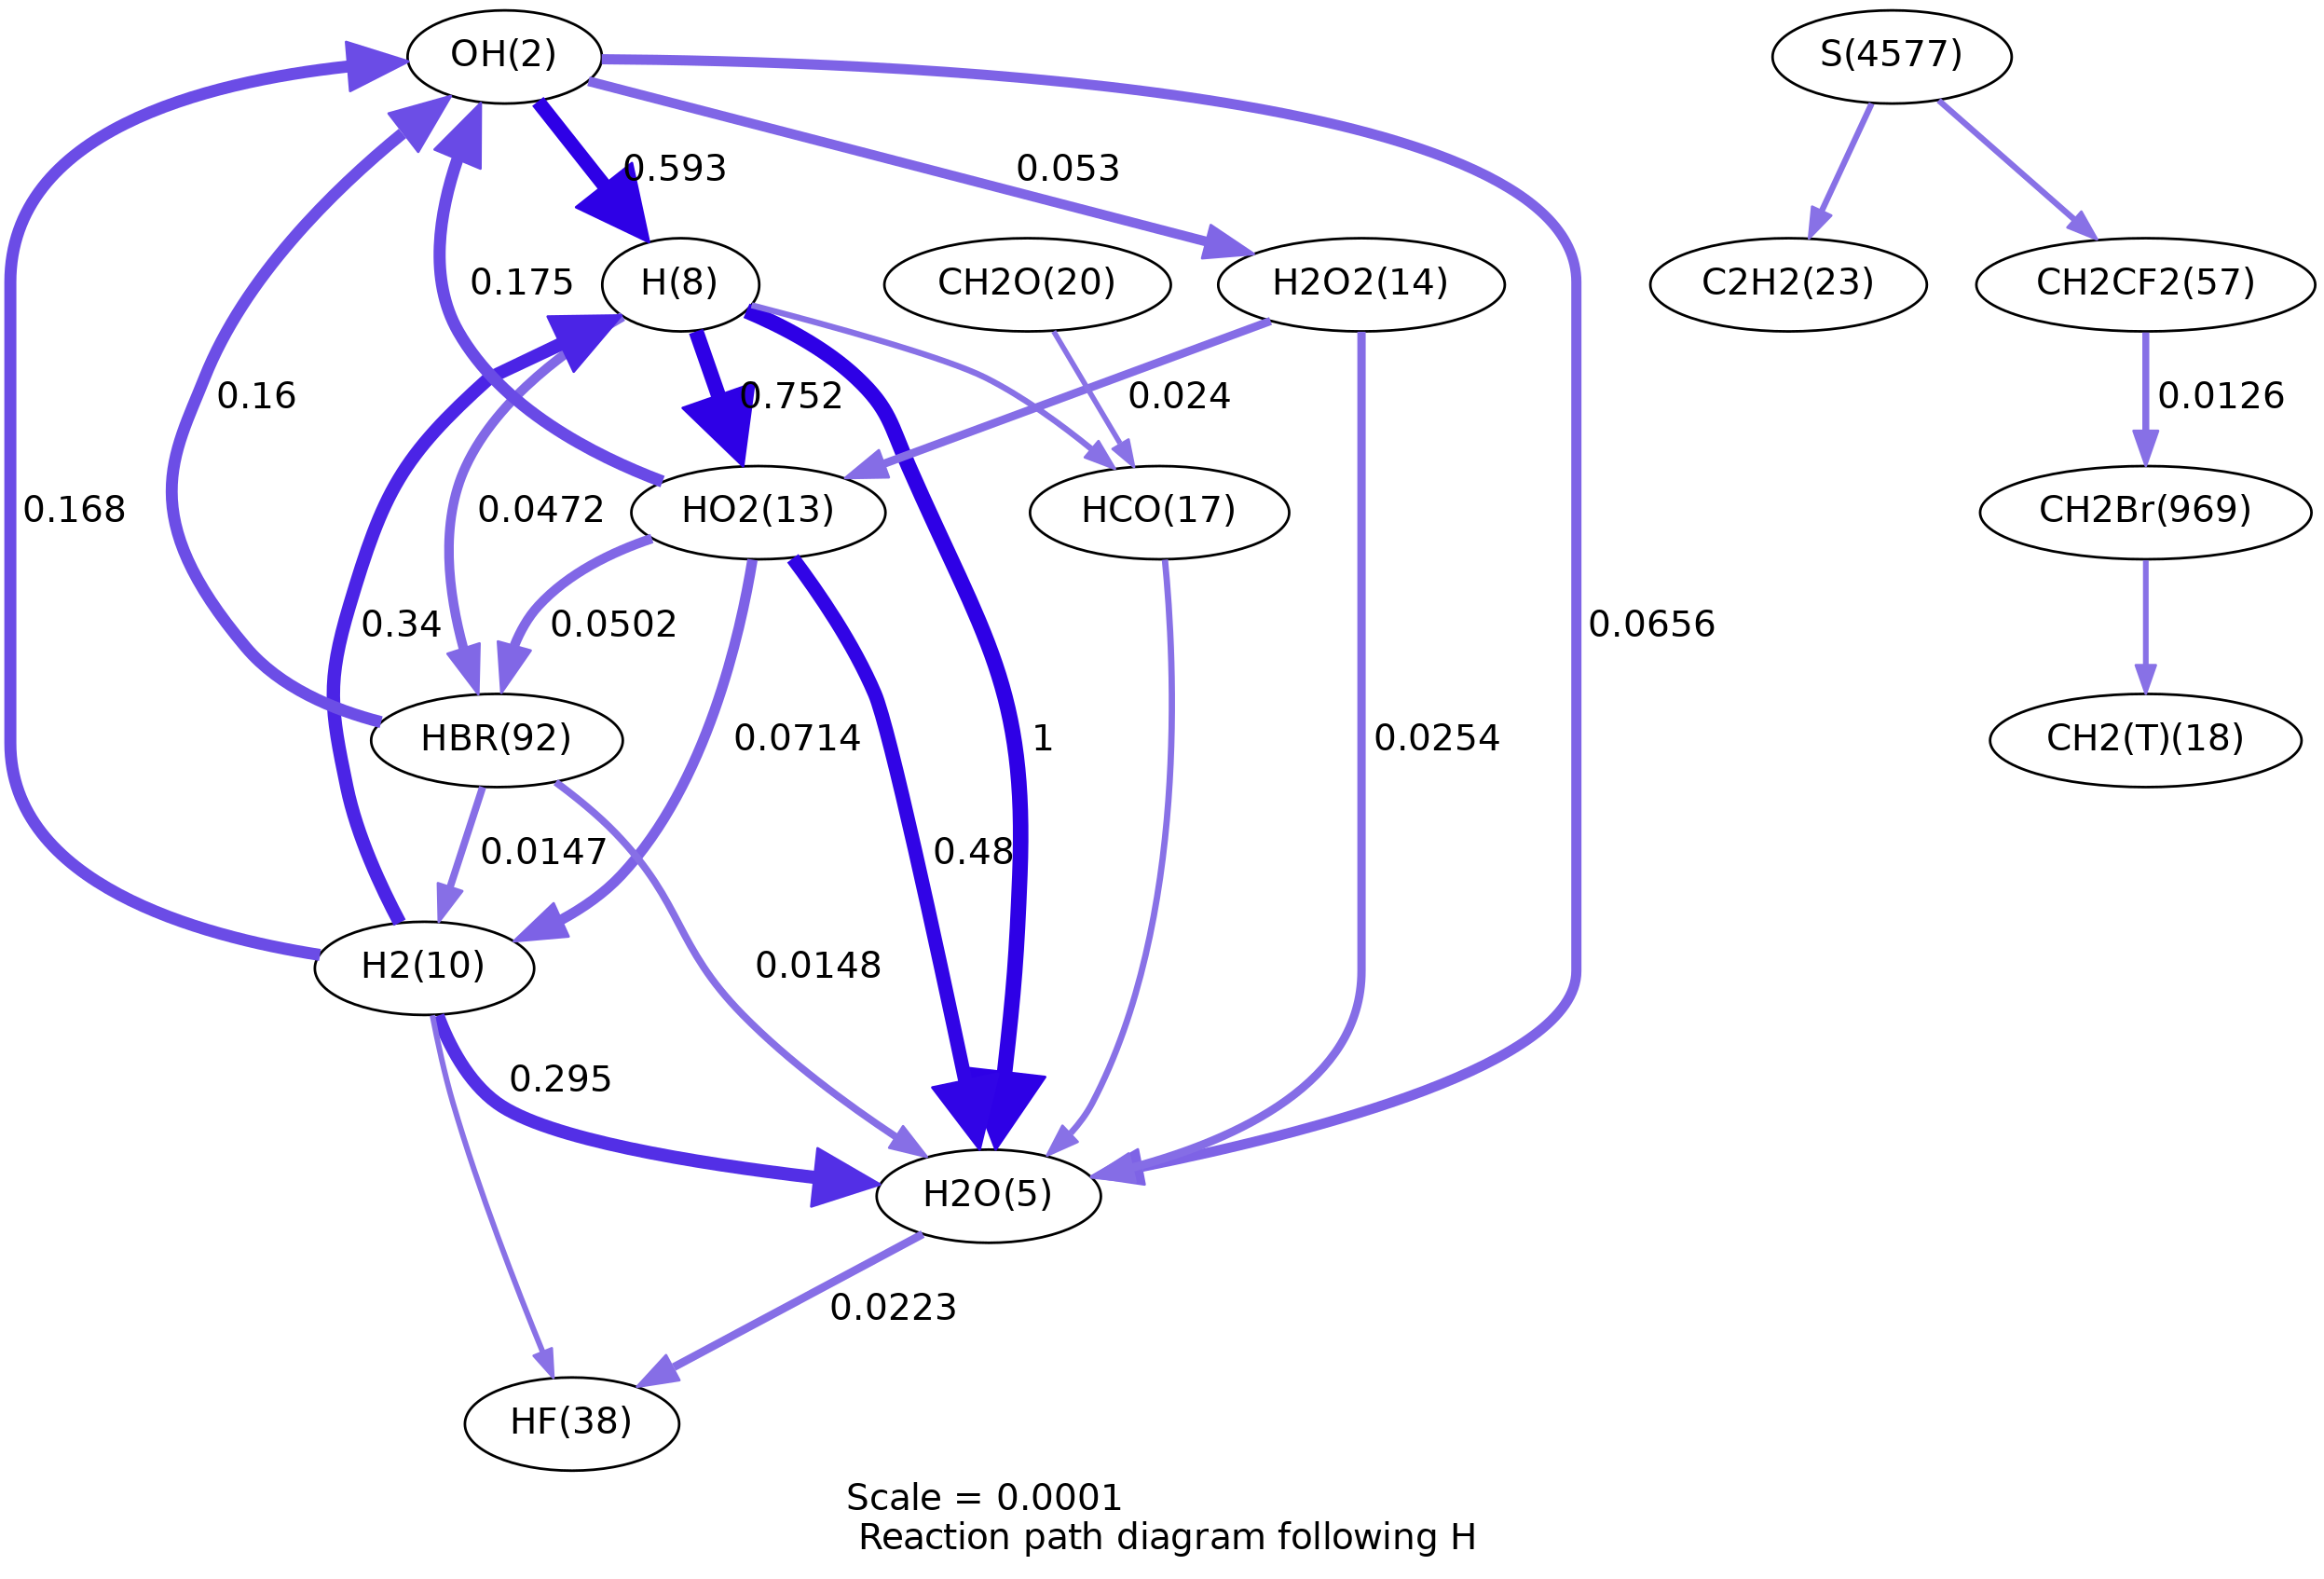

In [12]:
display(Image.open("rxnpath.png"))

In [ ]:
for i, j in zip(gas.species_names, gas.X):
    print(i,j)

In [13]:
sens = r.get_flame_speed_reaction_sensitivities()

print()
print('Rxn #   k/S*dS/dk    Reaction Equation')
print('-----   ----------   ----------------------------------')
for m in range(gas.n_reactions):
    print('{: 5d}   {: 10.3e}   {}'.format(
          m, sens[m], gas.reaction(m).equation))




Rxn #   k/S*dS/dk    Reaction Equation
-----   ----------   ----------------------------------
    0    4.778e-01   H(8) + O2(4) <=> O(9) + OH(2)
    1    3.213e-03   H2(10) + O(9) <=> H(8) + OH(2)
    2    2.338e-02   H2(10) + O(9) <=> H(8) + OH(2)
    3    2.578e-02   H2(10) + OH(2) <=> H(8) + H2O(5)
    4    1.318e-02   2 OH(2) <=> H2O(5) + O(9)
    5   -2.355e-03   H2(10) + M <=> 2 H(8) + M
    6    0.000e+00   Ar(11) + H2(10) <=> Ar(11) + 2 H(8)
    7    0.000e+00   H2(10) + He(12) <=> 2 H(8) + He(12)
    8   -1.896e-04   2 O(9) + M <=> O2(4) + M
    9    0.000e+00   Ar(11) + 2 O(9) <=> Ar(11) + O2(4)
   10    3.615e-35   He(12) + 2 O(9) <=> He(12) + O2(4)
   11   -1.018e-02   H(8) + O(9) + M <=> OH(2) + M
   12   -1.874e-02   H2O(5) + M <=> H(8) + OH(2) + M
   13   -1.640e-02   2 H2O(5) <=> H(8) + H2O(5) + OH(2)
   14   -2.011e-02   H(8) + HO2(13) <=> H2(10) + O2(4)
   15    2.337e-02   H(8) + HO2(13) <=> 2 OH(2)
   16    3.186e-04   H(8) + HO2(13) <=> H2O(5) + O(9)
   17   -2.0

In [14]:
######## sort the sensitivities by magnitude #######################################

sensitivity = {}
for m in range(gas.n_reactions):
    sensitivity[m] = abs(sens[m])
    
sorted_sensitivity = dict(sorted(sensitivity.items(), key=lambda item: item[1], reverse=True))

######### revert the sensitivity values back to original sign  ####################

sorted_sensitivity_list = [[k,sens[k],gas.reaction(k).equation] for k,v in sorted_sensitivity.items() ]

######## only store the top 10 most sensitive reactions #######################

rxn_sensitivity_values = [triplet for triplet in sorted_sensitivity_list[0:10]]


rxn_sensitivity_values

[[0, 0.47777176309818176, 'H(8) + O2(4) <=> O(9) + OH(2)'],
 [32, 0.11855879765326222, 'HCO(17) + M <=> CO(15) + H(8) + M'],
 [356, -0.10232291448276146, 'H(8) + O2(4) <=> HO2(13)'],
 [244, -0.09386819266634902, 'CH3(19) + H(8) <=> CH4(3)'],
 [29, 0.08438093661652683, 'CO(15) + OH(2) <=> CO2(16) + H(8)'],
 [90, -0.06295079099407892, 'CH3(19) + O(9) <=> CH2O(20) + H(8)'],
 [1017, 0.0515889799867489, 'CH2(T)(18) + O2(4) <=> CHO2(230) + H(8)'],
 [93, 0.050642505129545476, 'CH3(19) + OH(2) <=> CH2(S)(25) + H2O(5)'],
 [36, -0.03913153753247451, 'HCO(17) + OH(2) <=> CO(15) + H2O(5)'],
 [33, -0.036699167463080475, 'H(8) + HCO(17) <=> CO(15) + H2(10)']]

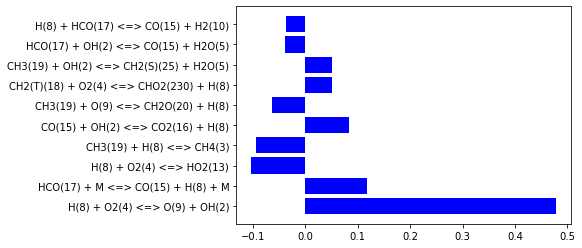

In [46]:
fig, ax = plt.subplots()
for x in rxn_sensitivity_values: 
    ax.barh(x[2], x[1], color='b', label=x[0], align='center')


From Cantera's review of flamespeeds: 



"In this example we simulate a freely-propagating, adiabatic, 1-D flame, calculate its laminar burning velocity and perform a sensitivity analysis of its kinetics."

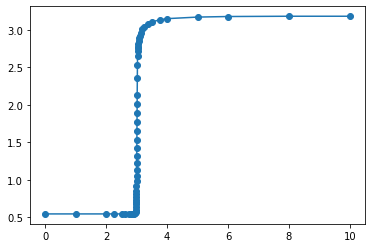

In [17]:
########### plot the major species
plt.figure()

plt.plot(r.grid*100, r.velocity, "-o")

# each FreeFlame object produces the diagram that you think of when you hear "flamespeed". Products downstream of the flame would have a different exit velocity since the temperature of the products is different. 
# Increased T means greater Volume, so velocity has to increase if Steady State

In [56]:
########### what happens if we use the sensitivity analysis offered on the Cantera example: 
import pandas as pd

# Create a dataframe to store sensitivity-analysis data
sensitivities = pd.DataFrame(index=gas.reaction_equations(), columns=["base_case"])

dk = 1e-2
Su0 = r.velocity[0]
for m in range(gas.n_reactions):
    gas.set_multiplier(1.0)  # reset all multipliers
    gas.set_multiplier(1 + dk, m)  # perturb reaction m

    # Always force loglevel=0 for this
    # Make sure the grid is not refined, otherwise it won't strictly
    # be a small perturbation analysis
    # Turn auto-mode off since the flame has already been solved
    r.solve(loglevel=0, refine_grid=False, auto=False)

    # The new flame speed
    Su = r.velocity[0]

    sensitivities.iloc[m, 0] = (Su - Su0) / (Su0 * dk)

# This step is essential, otherwise the mechanism will have been altered
gas.set_multiplier(1.0)



In [60]:


sensitivities_across_models = {1: 'hi', 3: 'a' , 4: 'b'}



sorted_sensitivities_across_models = dict(sorted(sensitivities_across_models.items(), key=lambda item: item[0], reverse=False))


sorted_sensitivities_across_models


{1: 'hi', 3: 'a', 4: 'b'}

In [55]:
import re
match = re.search('copy_chem0([0-9]+).cti', 'copy_chem0.cti')
assert match.group(1)

match.group(1)

AttributeError: 'NoneType' object has no attribute 'group'